In [10]:
# import os
import os.path
# import modules to save model
from joblib import dump, load
import pickle
# image preprocessing modules
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import itertools
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# models modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
# metrics modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
# cross-validation modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# grid module
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

tf.__version__

'2.8.0'

In [4]:
# loading fashion_mnist dataset from keras 
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# creating list to hold label tags for different fashion images 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(X_train.shape, y_train.shape, '||', X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) || (10000, 28, 28) (10000,)


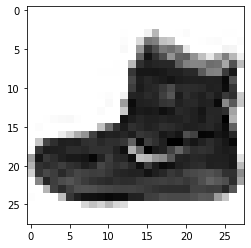

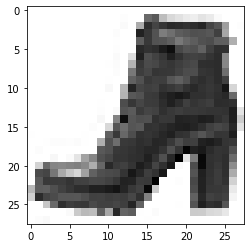

In [6]:
import numpy as np

shuffle_index = np.random.permutation(30000)
trainX, trainY = trainX[shuffle_index], trainY[shuffle_index]

plt.imshow(X_train[0], cmap='binary')
plt.show()
plt.imshow(trainX[0], cmap='binary')
plt.show()


In [7]:
scaler = StandardScaler()

# reshaped dataset, from 3d to 2d
nsamples, nx, ny = X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny))

# scaling dataset
X_train_scaled = scaler.fit_transform(d2_train_dataset.astype(np.float64))
X_train_scaled

array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

In [9]:
# The classifier_scores function will help determie the accuracy and precision
# The array will contain 3 evaluation scores.
def classifier_scores(score_array):
    print("Scores:", score_array)
    print("Mean:", score_array.mean())
    print("Standard deviation:", score_array.std())

In [174]:
# The plot_confusion_matrix function will help plot a confusion matrix
# This will help visualize the performace of models
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('true labels')
    plt.xlabel('predicted labels')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

In [54]:
%%HTML
<h1 style="color: blue;">Logistic Regression</h1>

In [166]:
# Creating logistic_regression variable for fittig.
logistic_regression = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, max_iter=200, random_state=42)
logistic_regression.fit(X_train_scaled, y_train)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=200, multi_class='multinomial',
                   random_state=42)

5 || 5
Sandal <- Fact
Sandal <- Prediction


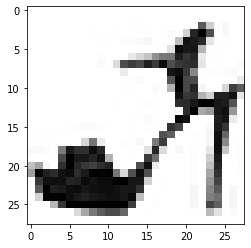

In [153]:
# Making predictions with logistic_regression and comparing with the loaded dataset. 
log_regression_predictions = logistic_regression.predict(X_train_scaled)
print(y_train[9], '||', log_regression_predictions[9])
print(class_names[y_train[9]], '<- Fact')
print(class_names[y_train[9]], '<- Prediction')
plt.imshow(X_train[9], cmap='binary')
plt.show()

In [154]:
# Checking the accuracy & precision of the classifier using sklearn metrics accuracy_score and precision_score
log_accuracy = accuracy_score(y_train, log_regression_predictions)
log_precision = precision_score(y_train, log_regression_predictions, average='weighted')

print("Logistic Accuracy: ", log_accuracy * 100,)
print("Logistic Precision: ", log_precision * 100, )

Logistic Accuracy:  87.75500000000001
Logistic Precision:  87.66648092442357


In [165]:
# Getting proper score of the classifier using cross validation
log_regression_accuracy_score = cross_val_score(logistic_regression, X_train_scaled, y_train, cv=3, scoring="accuracy") 
classifier_scores(log_regression_accuracy_score)
log_regression_accuracy = log_regression_accuracy_score.mean()

log_regression_precision_score = cross_val_predict(logistic_regression, X_train_scaled, y_train, cv=3)
log_regression_precision = precision_score(y_train, log_regression_predictions, average='weighted')
cm_log_regression = confusion_matrix(y_train, log_regression_precision_score)

print("(C.Validation) Logistic Regression Accuracy: ", log_regression_accuracy, '|', round(log_regression_accuracy,6)*100, '%')
print("(C.Validation) Decision Tree Precision: ", log_regression_precision,  '|', round(log_regression_precision,6)*100, '%')

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Scores: [0.8503  0.8599  0.85545]
Mean: 0.8552166666666666
Standard deviation: 0.003922654996583615


C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(C.Validation) Logistic Regression Accuracy:  0.8552166666666666 | 85.5217 %
(C.Validation) Decision Tree Precision:  0.8766648092442357 | 87.6665 %


Confusion matrix, without normalization
[[4952   15   97  275   25   13  550    4   64    5]
 [  21 5804   19  115   12    1   24    2    2    0]
 [  95   14 4508   62  709    9  557    2   43    1]
 [ 202   69   66 5278  193    1  168    3   18    2]
 [  13   12  526  199 4718    7  498    2   25    0]
 [   4    1    0    3    1 5579    4  260   45  103]
 [ 860   14  685  196  555    6 3587    8   87    2]
 [   1    0    0    0    0  213    0 5563   13  210]
 [  42    4   38   44   17   46  107   39 5648   15]
 [   0    1    0    1    0   99    1  218    4 5676]]


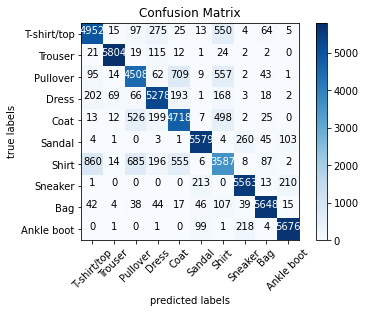

In [177]:
# Calling the plot_confusion_matrix function to plot a confusion matrix
cm_plot_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plot_confusion_matrix(cm=cm_log_regression, classes=cm_plot_labels, title='Confusion Matrix')

In [56]:
%%HTML
<h1 style="color: blue;">Decision Trees</h1>

In [160]:
# Creating decision_tree variable for fittig.
decision_tree = DecisionTreeClassifier(max_depth=50, random_state=42)
decision_tree.fit(d2_train_dataset, y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

(60000, 784)
9 || 9
Ankle boot <- Fact
Ankle boot <- Prediction


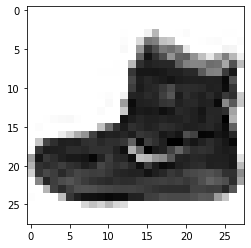

In [203]:
# Making prediction with dec_tree_predictions and comparing with the loaded dataset. 
dec_tree_predictions = decision_tree.predict(d2_train_dataset)
print(y_train[0], '||', dec_tree_predictions[0])
print(class_names[y_train[0]], '<- Fact')
print(class_names[dec_tree_predictions[0]], '<- Prediction')
plt.imshow(X_train[0], cmap='binary')
plt.show()

In [162]:
# Checking the accuracy & precision of the classifier using sklearn metrics accuracy_score and precision_score
dec_tree_accuracy = accuracy_score(y_train, dec_tree_predictions)
dec_tree_precision = precision_score(y_train, dec_tree_predictions, average='weighted')

print("Decision Tree Accuracy: ", dec_tree_accuracy * 100)
print("Decision Tree Precision: ", dec_tree_precision * 100)

Decision Tree Accuracy:  100.0
Decision Tree Precision:  100.0


In [146]:
# Getting proper score of the classifier using cross validation
decision_tree_accuracy_score = cross_val_score(decision_tree, X_train_scaled, y_train, cv=3, scoring="accuracy") 
classifier_scores(decision_tree_accuracy_score)
decision_tree_accuracy = decision_tree_accuracy_score.mean()

decision_tree_precision_score = cross_val_predict(decision_tree, X_train_scaled, y_train, cv=3)
decision_tree_precision = precision_score(y_train, dec_tree_predictions, average='weighted')
cm_decision_tree = confusion_matrix(y_train, decision_tree_precision_score)

print("(C.Validation) Decision Tree Accuracy: ", decision_tree_accuracy, '|', round(decision_tree_accuracy,6)*100, '%')
print("(C.Validation) Decision Tree Precision: ", decision_tree_precision,  '|', round(decision_tree_precision,6)*100, '%')

Scores: [0.7867  0.79115 0.79075]
Mean: 0.7895333333333333
Standard deviation: 0.0020101133190831865
(C.Validation) Decision Tree Accuracy:  0.7895333333333333 | 78.9533 %
(C.Validation) Decision Tree Precision:  1.0 | 100.0 %


Confusion matrix, without normalization
[[4429   44  124  283   62   18  962    2   72    4]
 [  41 5663   28  183   29    3   41    0    9    3]
 [ 128   28 4049  111  875    9  732    0   58   10]
 [ 312  170  122 4749  317   10  268    2   44    6]
 [  72   24  886  291 3988    3  671    1   59    5]
 [  13    9    5   19    8 5259   17  400   89  181]
 [ 913   33  758  228  658    8 3264    4  122   12]
 [   1    0    0    0    0  369    0 5213   31  386]
 [  60   13   76   53   82   72  167   40 5401   36]
 [   7    1   10    4    7  160   10  427   17 5357]]


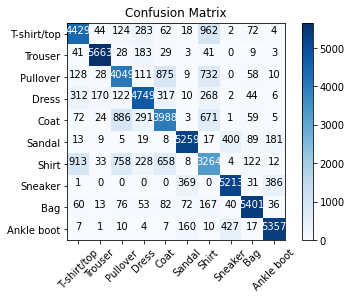

In [173]:
# Calling the plot_confusion_matrix function to plot a confusion matrix
cm_plot_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plot_confusion_matrix(cm=cm_decision_tree, classes=cm_plot_labels, title='Confusion Matrix')

In [76]:
%%HTML
<h1 style="color: blue;">Random Forest</h1>

In [702]:
# Creating random_forest variable for fittig.
random_forest = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
random_forest.fit(d2_train_dataset, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

5 || 5
Sandal <- Fact
Sandal <- Prediction


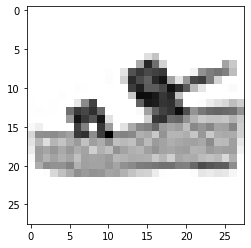

In [121]:
# Making prediction with rand_forest_predictions and comparing with the loaded dataset. 
rand_forest_predictions = random_forest.predict(d2_train_dataset)
print(y_train[12], '||', rand_forest_predictions[12])
print(class_names[y_train[12]], '<- Fact')
print(class_names[rand_forest_predictions[12]], '<- Prediction')
plt.imshow(X_train[12], cmap='binary')
plt.show()

In [122]:
# Checking the accuracy & precision of the classifier using sklearn metrics accuracy_score and precision_score
rand_forest_accuracy = accuracy_score(y_train, rand_forest_predictions)
rand_forest_precision = precision_score(y_train, rand_forest_predictions, average='weighted')

print("Random Forest Accuracy: ", rand_forest_accuracy * 100)
print("Random Forest Precision: ", rand_forest_precision * 100)

Random Forest Accuracy:  99.99833333333333
Random Forest Precision:  99.99833361106482


In [172]:
# Getting proper score of the classifier using cross validation
rand_forest_accuracy_score = cross_val_score(random_forest, X_train_scaled, y_train, cv=3, scoring="accuracy") 
classifier_scores(rand_forest_accuracy_score)
rand_forest_accuracy = rand_forest_accuracy_score.mean()

rand_forest_precision_score = cross_val_predict(random_forest, X_train_scaled, y_train, cv=3)
rand_forest_precision = precision_score(y_train, rand_forest_predictions, average='weighted')
cm_rand_forest = confusion_matrix(y_train, rand_forest_precision_score)

print("(C.Validation) Decision Tree Accuracy: ", rand_forest_accuracy, '|', round(rand_forest_accuracy,6)*100, '%')
print("(C.Validation) Decision Tree Precision: ", rand_forest_precision,  '|', round(rand_forest_precision,6)*100, '%')

Scores: [0.8776 0.8825 0.8805]
Mean: 0.8802
Standard deviation: 0.0020116328359485736
(C.Validation) Decision Tree Accuracy:  0.8802 | 88.02 %
(C.Validation) Decision Tree Precision:  0.9999833361106482 | 99.9983 %


Confusion matrix, without normalization
[[5169    2   88  192   26    4  458    0   61    0]
 [   7 5793   23  136    8    1   30    0    2    0]
 [  37    3 4872   63  674    1  311    0   39    0]
 [ 120   19   45 5513  171    0  124    0    8    0]
 [  14    7  480  212 5005    1  260    0   20    1]
 [   0    0    0    1    0 5732    2  180   24   61]
 [ 945    5  699  150  527    3 3575    0   96    0]
 [   0    0    0    0    0  106    0 5619    9  266]
 [   9    2   23   21   22   17   71   12 5822    1]
 [   0    0    2    1    0   67    3  208    7 5712]]


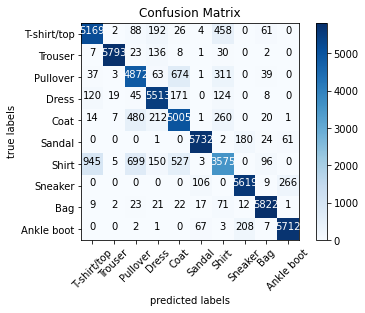

In [176]:
# Calling the plot_confusion_matrix function to plot a confusion matrix
cm_plot_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plot_confusion_matrix(cm=cm_rand_forest, classes=cm_plot_labels, title='Confusion Matrix')

# Results
### According to the above results, the Random Forest model outperforms other models.

0 || [0]
T-shirt/top <- Fact
T-shirt/top <- Prediction


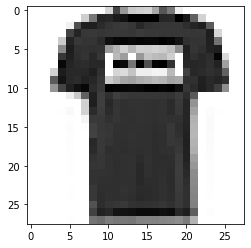

In [452]:
# Saving the elected model and loading it using joblib's dump and load

# dump(random_forest, 'random_forest.joblib')
random_forest_elect = load('random_forest.joblib')

print(y_train[1], '||', random_forest_elect.predict(d2_train_dataset[1].reshape(1, -1)))
print(class_names[y_train[1]], '<- Fact' )
print(class_names[random_forest_elect.predict(d2_train_dataset[1].reshape(1, -1))[0]], '<- Prediction' )
plt.imshow(X_train[1], cmap='binary')
plt.show()

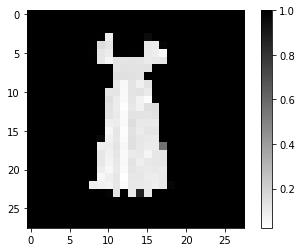

In [580]:
# The prepare_image function will help prepare an image for display using matplotlib 
def prepare_image(file):
    image_path = 'fashion/'
    image = load_img(image_path + file, color_mode='grayscale', target_size=(28, 28))
    image = img_to_array(image)
    image = image.reshape(28, 28, 1)
    # prepare pixel data
    image = image.astype('float32')
    image = image / 255.0
    return image
img = prepare_image('13.JPG')
plt.imshow(img, cmap='binary')
plt.colorbar()
plt.show()
# print(img)

In [657]:
# The image_reshape function will resize and prepare test images. 
def image_reshape(img):
    img = Image.open('./fashion/' + img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

# Navigating to the folder holding the images using relative path
# Creating an empty list 'image_list' to hold images
images = os.listdir('fashion') 
image_list = []

for image in images:
    image_list.append(image_reshape(image))

NameError: name 'image_list' is not defined

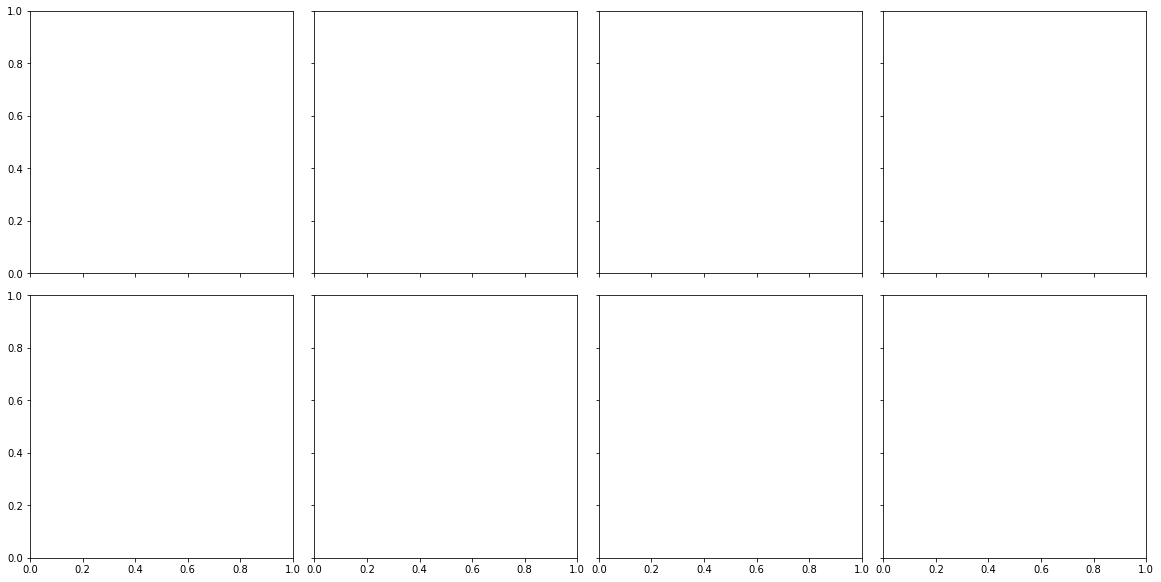

In [11]:
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 # creates 2 by 4 grid of axes
                 nrows_ncols=(2, 4),
                 # padding between axes
                 axes_pad=0.3 )
for ax, im in zip(grid, image_list):
    ax.imshow(im)

plt.show()

8
['06.jpg', '10.jpg', '11.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '18.jpg']


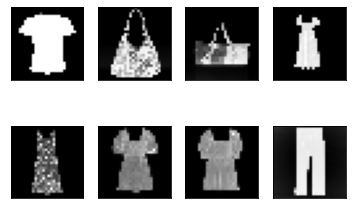

In [681]:
path = 'fashion/'
items = os.listdir(path)

# create list 'file_name' to hold images
file_name = []
for i in items:
    file_name.append(i)
    
print(len(file_name))
print(file_name)

# displaying images after calling the 'prepare_image' function
counter = 0    
for i in range(8):
    plt.subplot(2, 4, i + 1)
#     plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(prepare_image(file_name[counter]), cmap=plt.cm.binary)
    counter += 1
plt.show()



In [701]:
# load the image
image = prepare_image('11.JPG')
print(image.shape)
nx, ny, nsamples = image.shape
d2_image_array = image.reshape((nx*ny, nsamples))
d2_image_array2 = image.reshape((nsamples, nx*ny))

print(d2_image_array2.shape, ' <- shape of test image')
print(d2_train_dataset.shape, ' <- shape of fashion mnist images')

random_forest_elect_scaled = scaler.fit_transform(d2_image_array2.astype(np.float64))

# usign the saved modelto predict the loaded dataset (fashion mnist) label 
random_forest_elect_predictions = random_forest_elect.predict(d2_train_dataset[0].reshape(1, -1))
# usign the saved modelto predict the test image's label 
result = class_names[random_forest_elect.predict(d2_image_array2.reshape(1, -1))[0]]
print(class_names[random_forest_elect_predictions[0]], '<- Fashion mnist prediction by (Random Forest)')
print(result)

(28, 28, 1)
(1, 784)  <- shape of test image
(60000, 784)  <- shape of fashion mnist images
Ankle boot <- Fashion mnist prediction by (Random Forest)
Sandal
[9 0 0 3 0 2 7 2 5 5]


In [703]:
# Getting proper score of the elected classifier using cross validation
random_forest_elect_accuracy_score = cross_val_score(random_forest_elect, X_train_scaled, y_train, cv=3, scoring="accuracy") 
classifier_scores(random_forest_elect_accuracy_score)
random_forest_elect_accuracy = random_forest_elect_accuracy_score.mean()

print("(C.Validation) Random Forest Accuracy: ", random_forest_elect_accuracy, '|', round(random_forest_elect_accuracy,6)*100, '%')

Scores: [0.8776 0.8825 0.8805]
Mean: 0.8802
Standard deviation: 0.0020116328359485736
(C.Validation) Random Forest Accuracy:  0.8802 | 88.02 %


Confusion matrix, without normalization
[[4429   44  124  283   62   18  962    2   72    4]
 [  41 5663   28  183   29    3   41    0    9    3]
 [ 128   28 4049  111  875    9  732    0   58   10]
 [ 312  170  122 4749  317   10  268    2   44    6]
 [  72   24  886  291 3988    3  671    1   59    5]
 [  13    9    5   19    8 5259   17  400   89  181]
 [ 913   33  758  228  658    8 3264    4  122   12]
 [   1    0    0    0    0  369    0 5213   31  386]
 [  60   13   76   53   82   72  167   40 5401   36]
 [   7    1   10    4    7  160   10  427   17 5357]]


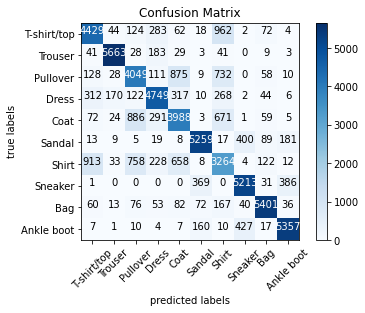

In [459]:
# Calling the plot_confusion_matrix function to plot a confusion matrix
cm_plot_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plot_confusion_matrix(cm=cm_decision_tree3, classes=cm_plot_labels, title='Confusion Matrix')